# Ames Housing Notebook: 01 - Cleaning
***
## Importing baseline packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading in train.csv, the training data of the Ames Housing dataset

In [3]:
train_df = pd.read_csv('../datasets/train.csv')

In [4]:
train_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


### Fixing column names to be lower case / snake_case

In [5]:
train_df.columns = [column_name.lower().replace(' ', '_') for column_name in train_df.columns]

### Examining counts of rows & columns, column data types, and missing values for training data

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

### Looks like there are many columns with non numeric data, as well as a number of columns that are missing values.  Need to investigate further.
***
### Having a look into the sum of null values for each column

In [7]:
train_df.isnull().sum().sort_values(ascending = False).head(50)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
total_bsmt_sf        1
bsmtfin_sf_1         1
overall_cond         0
exterior_2nd         0
exterior_1st         0
roof_matl            0
roof_style           0
year_remod/add       0
year_built           0
saleprice            0
overall_qual         0
land_contour         0
pid                  0
ms_subclass          0
ms_zoning            0
lot_area             0
street               0
lot_shape            0
utilities            0
house_style

#### The columns of: pool quality, miscellaneous features, alley, fence, fireplace quality, and lot frontage have way too many null values, rendering the columns not workable.  Going to drop these columns and see about how to make it work with the other columns that have little more than 100 null values.

In [8]:
train_df = train_df.drop(['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu','lot_frontage'], axis=1)

### Dropped all columns with more than 300 null values.
***
### Now, examining the columns with more manageable null values

In [9]:
train_df.isnull().sum().sort_values(ascending = False).head(22)

garage_finish     114
garage_yr_blt     114
garage_qual       114
garage_cond       114
garage_type       113
bsmt_exposure      58
bsmtfin_type_2     56
bsmt_qual          55
bsmtfin_type_1     55
bsmt_cond          55
mas_vnr_area       22
mas_vnr_type       22
bsmt_full_bath      2
bsmt_half_bath      2
bsmtfin_sf_2        1
bsmtfin_sf_1        1
bsmt_unf_sf         1
total_bsmt_sf       1
garage_cars         1
garage_area         1
exterior_2nd        0
pid                 0
dtype: int64

#### Still a number of columns to work with.  Going to do a correlations heat map to see which columns(variables) I will want to use.  Columns with low correlation may be better suited for dropping than being filled in with mean or median values.

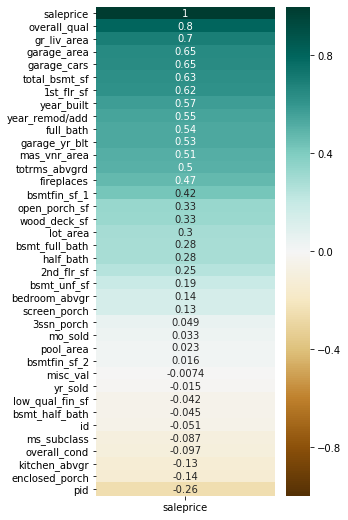

In [10]:
# plot a correlations heat map
saleprice_corr = train_df.corr()[['saleprice']].sort_values('saleprice', ascending=False)
plt.figure(figsize = (4,9))
sns.heatmap(saleprice_corr,
           vmin =-1,
           vmax = 1,
           cmap='BrBG',
            annot=True)

### Realizing that only the numeric columns shown up in the heatmap, I will make dummy columns to get numeric representation for the non-numeric columns
***
### Setting up dummy columns

In [11]:
dummy = pd.get_dummies(train_df)

In [12]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 271 entries, id to sale_type_WD 
dtypes: float64(10), int64(28), uint8(233)
memory usage: 1.1 MB


### # of columns jumped from 81 to 271 after dummying
***
### Merging train_df columns with the dummy columns and then re-examining the sum of null values for each column

In [13]:
train_df = pd.merge(train_df, dummy, right_index=True, left_index=True)

In [14]:
train_df.isnull().sum().sort_values(ascending = False).head(35)

garage_yr_blt_y         114
garage_cond             114
garage_yr_blt_x         114
garage_qual             114
garage_finish           114
garage_type             113
bsmt_exposure            58
bsmtfin_type_2           56
bsmt_cond                55
bsmtfin_type_1           55
bsmt_qual                55
mas_vnr_area_x           22
mas_vnr_area_y           22
mas_vnr_type             22
bsmt_full_bath_x          2
bsmt_full_bath_y          2
bsmt_half_bath_y          2
bsmt_half_bath_x          2
garage_cars_y             1
total_bsmt_sf_y           1
garage_cars_x             1
total_bsmt_sf_x           1
bsmt_unf_sf_x             1
bsmtfin_sf_2_x            1
garage_area_x             1
bsmtfin_sf_1_x            1
garage_area_y             1
bsmtfin_sf_1_y            1
bsmt_unf_sf_y             1
bsmtfin_sf_2_y            1
neighborhood_ClearCr      0
ms_zoning_RL              0
saleprice_y               0
ms_zoning_A (agr)         0
ms_zoning_C (all)         0
dtype: int64

### Filling in the null values for each column using with the median values of each column

In [15]:
# train_df2 = 
train_df = train_df.fillna(train_df.median())

### Re-examining the sum of null values

In [17]:
train_df.isnull().sum().sort_values(ascending = False).head(12)

garage_cond          114
garage_finish        114
garage_qual          114
garage_type          113
bsmt_exposure         58
bsmtfin_type_2        56
bsmt_qual             55
bsmt_cond             55
bsmtfin_type_1        55
mas_vnr_type          22
ms_zoning_I (all)      0
ms_zoning_RH           0
dtype: int64

#### Filling the null values with the median worked for a few columns.  The columns that remain with null values are categorical and need to be filled one at a time with the average categorical value.
***
#### Looking at the first column - 'garage_cond' to see which of the 5 conditions has the highest count

In [205]:
train_df[['garage_cond']].groupby(train_df['garage_cond']).agg(['count', 'size', 'nunique'])

garage_cond              
                  count  size nunique
garage_cond                          
Ex                    2     2       1
Fa                   47    47       1
Gd                   12    12       1
Po                    8     8       1
TA                 1868  1868       1

#### TA(Typical/Average) is by far the majority in all the rows of this column, so will replace the null values with TA

In [206]:
train_df['garage_cond'].fillna('TA', inplace = True)

#### Doing the same type of assessment for garage finish to determine which level of finish has the highest count

In [207]:
train_df[['garage_finish']].groupby(train_df['garage_finish']).agg(['count', 'size', 'nunique'])

garage_finish             
                      count size nunique
garage_finish                           
Fin                     509  509       1
RFn                     579  579       1
Unf                     849  849       1

This column has a more equal distribution of counts.  It might be advisable to drop the column because setting the nulls to the finish with the highest count, only has a 43.8% of being correct.  Then again, we are only talking about 114 out of 2051 rows, about 5% of the rows, so I will move forward to fill in the NAs with Unf.

In [208]:
train_df['garage_finish'].fillna('Unf', inplace = True)

#### Continuing to perform the same operations to the rest of the categorical columns with null values

In [209]:
train_df[['garage_qual']].groupby(train_df['garage_qual']).agg(['count', 'size', 'nunique'])

garage_qual              
                  count  size nunique
garage_qual                          
Ex                    3     3       1
Fa                   82    82       1
Gd                   18    18       1
Po                    2     2       1
TA                 1832  1832       1

In [210]:
train_df['garage_qual'].fillna('TA', inplace = True)

In [211]:
train_df[['garage_type']].groupby(train_df['garage_type']).agg(['count', 'size', 'nunique'])

garage_type              
                  count  size nunique
garage_type                          
2Types               19    19       1
Attchd             1213  1213       1
Basment              27    27       1
BuiltIn             132   132       1
CarPort              11    11       1
Detchd              536   536       1

In [212]:
train_df['garage_type'].fillna('Attchd', inplace = True)

In [213]:
train_df[['bsmt_exposure']].groupby(train_df['bsmt_exposure']).agg(['count', 'size', 'nunique'])

bsmt_exposure              
                      count  size nunique
bsmt_exposure                            
Av                      288   288       1
Gd                      203   203       1
Mn                      163   163       1
No                     1339  1339       1

In [214]:
train_df['bsmt_exposure'].fillna('No', inplace = True)

In [215]:
train_df[['bsmtfin_type_2']].groupby(train_df['bsmtfin_type_2']).agg(['count', 'size', 'nunique'])

bsmtfin_type_2              
                        count  size nunique
bsmtfin_type_2                             
ALQ                        35    35       1
BLQ                        48    48       1
GLQ                        23    23       1
LwQ                        60    60       1
Rec                        80    80       1
Unf                      1749  1749       1

In [216]:
train_df['bsmtfin_type_2'].fillna('Unf', inplace = True)

In [217]:
train_df[['bsmt_qual']].groupby(train_df['bsmt_qual']).agg(['count', 'size', 'nunique'])

bsmt_qual             
              count size nunique
bsmt_qual                       
Ex              184  184       1
Fa               60   60       1
Gd              864  864       1
Po                1    1       1
TA              887  887       1

In [218]:
train_df['bsmt_qual'].fillna('TA', inplace = True)

In [219]:
train_df[['bsmt_cond']].groupby(train_df['bsmt_cond']).agg(['count', 'size', 'nunique'])

bsmt_cond              
              count  size nunique
bsmt_cond                        
Ex                3     3       1
Fa               65    65       1
Gd               89    89       1
Po                5     5       1
TA             1834  1834       1

In [220]:
train_df['bsmt_cond'].fillna('TA', inplace = True)

In [221]:
train_df[['bsmtfin_type_1']].groupby(train_df['bsmtfin_type_1']).agg(['count', 'size', 'nunique'])

bsmtfin_type_1             
                        count size nunique
bsmtfin_type_1                            
ALQ                       293  293       1
BLQ                       200  200       1
GLQ                       615  615       1
LwQ                       102  102       1
Rec                       183  183       1
Unf                       603  603       1

In [222]:
train_df['bsmtfin_type_1'].fillna('Unf', inplace = True)

In [223]:
train_df[['mas_vnr_type']].groupby(train_df['mas_vnr_type']).agg(['count', 'size', 'nunique'])         

mas_vnr_type              
                    count  size nunique
mas_vnr_type                           
BrkCmn                 13    13       1
BrkFace               630   630       1
None                 1218  1218       1
Stone                 168   168       1

In [224]:
train_df['mas_vnr_type'].fillna('None', inplace = True)

### All the null values should be gone now.  Lets take one more look at the sum.

In [225]:
train_df.isnull().sum().sort_values(ascending = False).head(10)

sale_type_WD         0
ms_zoning_RL         0
mo_sold_y            0
yr_sold_y            0
saleprice_y          0
ms_zoning_A (agr)    0
ms_zoning_C (all)    0
ms_zoning_FV         0
ms_zoning_I (all)    0
ms_zoning_RH         0
dtype: int64

### No more Null values!

In [226]:
train_df[8:]

,id_x,pid_x,ms_subclass_x,ms_zoning,lot_area_x,street,lot_shape,land_contour,utilities,lot_config,...,paved_drive_Y,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
8,1942,535353130,20,RL,15783,Pave,Reg,Lvl,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
9,1956,535426130,60,RL,11606,Pave,IR1,HLS,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
10,1044,527451290,160,RM,1680,Pave,Reg,Lvl,AllPub,Inside,...,1,1,0,0,0,0,0,0,0,0
11,2752,906380150,20,RL,7488,Pave,IR1,Lvl,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
12,807,906226060,70,RL,26400,Pave,Reg,Bnk,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,11449,Pave,IR1,HLS,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
2047,785,905377130,30,RL,12342,Pave,IR1,Lvl,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
2048,916,909253010,50,RL,7558,Pave,Reg,Bnk,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
2049,639,535179160,20,RL,10400,Pave,Reg,Lvl,AllPub,Corner,...,1,0,0,0,0,0,0,0,0,1


Going to perform one more operation to clean the dataset.  There are a couple of homes with square footage between 4,000 - 6,000 sqft.  These outliers skew our data to the right and adversely affect the prediction accuracy of our model.  To remedy this, I will set the training data to only include homes whose square footage is less than or equal to 4,000 sqft.

In [227]:
train_df = train_df[train_df['gr_liv_area_x'] <= 4000]

### Satisfied with my clean data.  Going to save it as train_clean.csv

In [228]:
train_df.to_csv('../datasets/train_clean.csv')